In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_csv("books.csv")

Hemos hecho un analisis exploratorio y observamos que agrupando nuestros datos por alguna columna (en este caso 'name') los principales estadísticos no varian respecto a los no agrupados. 
Decidimos que en este pair usaremos los datos sin agrupar y tendremos en cuenta la agrupacion para futuros pair.

Os mostramos lo explicado anteriormente:

In [4]:
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


Agrupamos por `Name` para organizar nuestros datos por los libros más vendidos

In [6]:
frecuentes= df["Name"].value_counts()[0:50]
frecuentes

Publication Manual of the American Psychological Association, 6th Edition                             10
StrengthsFinder 2.0                                                                                    9
Oh, the Places You'll Go!                                                                              8
The Very Hungry Caterpillar                                                                            7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                           7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)                      6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)                              6
The Official SAT Study Guide                                                                           5
To Kill a Mockingbird                                                                                  5
The 5 Love Languages: The Secret to Love That Lasts    

Utilizamos un value_counts para sumar por título de libro y ver cuáles han sido los más repetidos en la lista desde 2009 hasta 2019

In [7]:
values = frecuentes.keys().to_list()
values

['Publication Manual of the American Psychological Association, 6th Edition',
 'StrengthsFinder 2.0',
 "Oh, the Places You'll Go!",
 'The Very Hungry Caterpillar',
 'The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change',
 'The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)',
 'Jesus Calling: Enjoying Peace in His Presence (with Scripture References)',
 'The Official SAT Study Guide',
 'To Kill a Mockingbird',
 'The 5 Love Languages: The Secret to Love That Lasts',
 'The 5 Love Languages: The Secret to Love that Lasts',
 'Laugh-Out-Loud Jokes for Kids',
 'How to Win Friends & Influence People',
 'Unbroken: A World War II Story of Survival, Resilience, and Redemption',
 'The Five Dysfunctions of a Team: A Leadership Fable',
 "Giraffes Can't Dance",
 'Wonder',
 'First 100 Words',
 'The Fault in Our Stars',
 'Dear Zoo: A Lift-the-Flap Book',
 'The Wonderful Things You Will Be',
 'The Life-Changing Magic of Tidying Up: The Japanese Art 

Sacamos el `value` a nuestros datos para obtener el título de los libros

In [8]:
df_name = df[df["Name"].isin(values)]
df_name

,Name,Author,User Rating,Reviews,Price,Year,Genre
46,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2010,Fiction
47,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2011,Fiction
48,Catching Fire (The Hunger Games),Suzanne Collins,4.7,22614,11,2012,Fiction
50,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
51,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2010,Non Fiction
...,...,...,...,...,...,...,...
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Con isin sacamos los datos del df general las filas en las que encuentra esos títulos sacados como los más repetidos.

Así obtenemos un df con los libros más vendidos organizados por años. También aquí podemos seleccionar el "top 50, top 25 o top 10" de los libros más vendidos, simplemente cambiando [:25],[:10]

## Ejercicio 1

Extraer las siguentes estadísiticas del conjunto de datos para varias de las varibles disponibles: 
 - Media, mediana, moda, máximo y mínimo, percentiles 25, 75

**Principales estadísticos variables numéricas**

Obtenemos la media, mediana, max, min y percentiles con métodos de **Pandas**

In [15]:
df_numericas = df[["User Rating", "Reviews", "Price", "Year"]]
df_numericas.head(3)

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018


In [37]:
df_categoricas = df[["Name", "Author", "Genre"]]
df_categoricas.head()

,Name,Author,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,Non Fiction
1,11/22/63: A Novel,Stephen King,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,Non Fiction
3,1984 (Signet Classics),George Orwell,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,Non Fiction


- Media

In [65]:
df_numericas.mean()

/tmp/ipykernel_869/4059674845.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_numericas.mean()


User Rating       4.6
Reviews       11953.3
Price            13.1
Year           2014.0
dtype: float64

El precio medio de nuestros libros es de 13.1. En este caso, la variable año no la tendremos en cuenta.

- Moda

In [63]:
df_numericas.mode()

,User Rating,Reviews,Price,Year,Price_groupby
0,4.8,8580.0,8.0,2009,"(-0.105, 21.0]"
1,NaN,NaN,NaN,2010,NaN
2,NaN,NaN,NaN,2011,NaN
3,NaN,NaN,NaN,2012,NaN
4,NaN,NaN,NaN,2013,NaN
5,NaN,NaN,NaN,2014,NaN
6,NaN,NaN,NaN,2015,NaN
7,NaN,NaN,NaN,2016,NaN
8,NaN,NaN,NaN,2017,NaN
9,NaN,NaN,NaN,2018,NaN


In [64]:
df_categoricas.mode()

,Name,Author,Genre
0,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction


- Mediana

El valor que más se repite de nuestras variables categóricas (la moda) es ese libro que aparece en el resultado. Tiene sentido ya que es el libro más vendido por lo que aparecerá más veces que ningún otro.

In [31]:
df_numericas.median()

User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
dtype: float64

- Desviación típica

In [32]:
df_numericas.std()

User Rating        0.226980
Reviews        11731.132017
Price             10.842262
Year               3.165156
dtype: float64

In [66]:
df_numericas.mean()

/tmp/ipykernel_869/4059674845.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_numericas.mean()


User Rating       4.6
Reviews       11953.3
Price            13.1
Year           2014.0
dtype: float64

La desviación típica nos informa de cuánto se separan nuestros datos del valor medio, exactamente, la media de las diferencias de todos los valores respecto a la media. 

En el caso de la desv. estándar de Price nos indica que la media de lo que se desvían es 10, y teniendo en cuenta que la media es 13  y la mediana 11 podemos decir que nuestros valores de Price no son muy dispersos, ya que todos ellos son valores muy similares.

- Máximo y mínimo

In [33]:
df_numericas.max()

User Rating        4.9
Reviews        87841.0
Price            105.0
Year            2019.0
dtype: float64

In [34]:
df_numericas.min()

User Rating       3.3
Reviews          37.0
Price             0.0
Year           2009.0
dtype: float64

Aquí vemos los valores máx y minimos de cada variable. Observamos que hay libros con nºa sw reviews muy diferentes: muy pocas Reviews (37) y otros con muchas (alrededor de 87800). También observamos que la valoración mínima es 3.3, y como nuestras valoraciones son de 0 a 5 podríamos decir que la valoración mínima es 'media -alta'. También observamos que hay libros gratuitos y hasta con un precio de 205, que sería el más caro.

En este ejercicio nos piden hacer todos los estadísticos básicos por métodos de **Pandas**, pero existe una función definida en Python  `describe` en el que nos muestras todos estos estadísticos básicos de forma mucho más práctica. Podemos indicarle que nos muestre tanto las variables categóricas como numércias gracias al argumento 'All'

In [30]:
df.describe(include = 'all')

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.000000,550.000000,550.000000,550.000000,550
unique,351,248,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,Non Fiction
freq,10,12,NaN,NaN,NaN,NaN,310
mean,NaN,NaN,4.618364,11953.281818,13.100000,2014.000000,NaN
std,NaN,NaN,0.226980,11731.132017,10.842262,3.165156,NaN
min,NaN,NaN,3.300000,37.000000,0.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4058.000000,7.000000,2011.000000,NaN
50%,NaN,NaN,4.700000,8580.000000,11.000000,2014.000000,NaN
75%,NaN,NaN,4.800000,17253.250000,16.000000,2017.000000,NaN


Aquí encontramos los principales estadísticos de todas las variables. Las numéricas de nuestro dataset:
- El valor 50% corresponde a la 'Mediana'.
- Observamos que la variable con menos desviación estándar es 'Year'. Esto tiene mucho sentido ya que los datos recogidos en nuestro df tienen un rango de 2009 - 2019, por lo que ya fueron "filtrados" previamente. Así, su dispersión es baja.
- La desviación típica (std) de la variable 'User Rating' es muy cercana a 0. Esto quiere decir que l@s usuari@s han valorado los libros de forma similar. Por lo tanto así también observamos que los percentiles 1 (en la tabla: 25%) y 3 (en la tabla: 75%) y la mediana (en la tabla: 50%) son valores muy semejantes.
- El valor mín de 'Price' es 0. Lo interpretamos como una falta de información/error en el registro del precio del libro o que hubo algún libro gratuito.

Las categóricas:
- Unique: nº de valores únicos que hay en ese col
- Top es la moda de ese valor. es decir, el valor más repetido
- Freq es las veces que se repite ese valor Top o Moda




_______________________________________________________________________________________________________________________________________________

- **Percentiles 75 y 25**

In [46]:
pd.options.display.float_format = '{:.1f}'.format
q3, q1 = np.percentile(df_numericas, [75,25], axis = 0)
iqr = q3 - q1
iqr

array([3.000000e-01, 1.319525e+04, 9.000000e+00, 6.000000e+00])

El rango intercuartílico (iqr) es la diferencia entre el cuartil 3 y el cuartil 1.  
- IQR columna "User rating": Observamos que el iqr de la columna "User rating" es 0.3. Con esto, confirmamos lo dicho anteriormente: l@s usuari@s que han valorado los libros lo han hecho de forma similar. Much@s de ell@s han puesto la misma nota a cada libro. Es una medida robusta...
- IQR columna "Reviews": El iqr de la columna 'Reviews' es 13195 (aprox). Interpretamos que al ser un valor tan "dispar" hay unos libros que han recibido muchas opiniones y otros libros muy pocas. 

In [50]:
df_num_sin_rew = df[["User Rating", "Price", "Year"]]

 * **Boxplot**

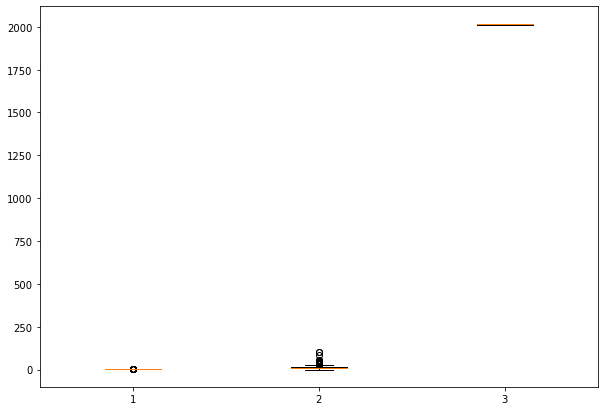

In [51]:
# Boxplot de algunas variables
fig = plt.figure(1, figsize= (10, 7))

ax = fig.add_subplot(111)                      
bp = ax.boxplot(df_num_sin_rew)


Hemos intentando representar nuestras 4 columnas numéricas en un único boxplot pero hemos concluído que no tiene sentido. Las 4 columnas tienen rangos de valores muy diferentes por los que al intentar representarlos al mismo tiempo solo aparecen las columnas con valores muy grandes. Hemos pensado en representar las 4 columnas por separado.

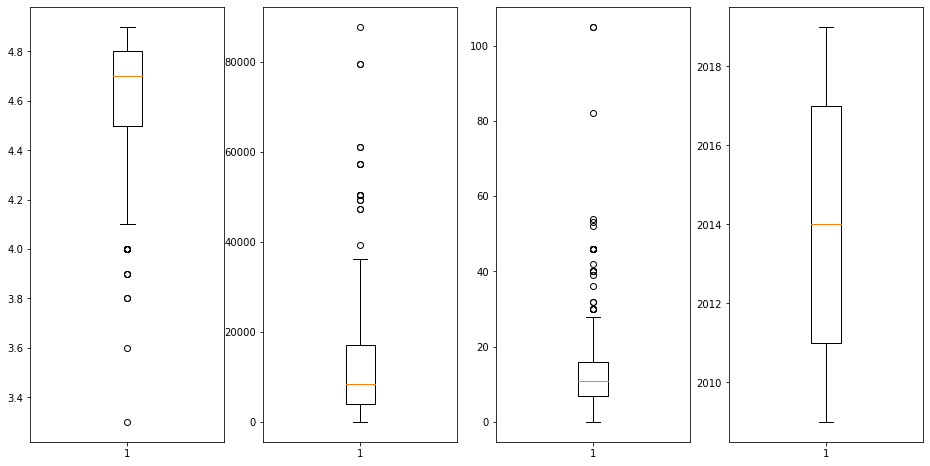

In [54]:
fig,ax = plt.subplots(1,4, figsize = (16,8))

caja_1 = df_numericas.loc[:,'User Rating']
caja_2 = df_numericas.loc[:,'Reviews']
caja_3 = df_numericas.loc[:,'Price']
caja_4 =  df_numericas.loc[:,'Year']

ax[0].boxplot(caja_1)
ax[1].boxplot(caja_2)
ax[2].boxplot(caja_3)
ax[3].boxplot(caja_4)

plt.show()


De esta forma vemos con más claridad los datos de cada tabla numérica de nuestro DF. Donde:
- Observamos que las columnas de User Rating, Reviews y Price contienen muchos outliers, es decir, valores atípicos o anormales ya que se encuentran fuera de los "bigotes" de la caja. Esto no siempre es malo. Algunos pueden ser importantes y otros solo ruido.
- Tendremos que estudiarlos para saber si son susceptibles de eliminar del DF.
- En cambio la columna 'Price' no tiene ningún outlier, ya que los años están dentro de un rango específico. Si tuvieramos alguno seguramente sería descartable.

**Tabla frecuencias**

- Varibles cuantitativas

In [56]:
frec_num = df_numericas.groupby('Price')
frec_price = frec_num.agg(frecuencia = ('Price', 'count'))
frec_price.head()

,frecuencia
Price,
0,12
1,1
2,5
3,1
4,32


- Hemos agrupado por 'Price' que tiene un rango de 0 a 105 como vimos anteriormente con el método describe(). 
- Con esto calculamos cuantos de nuestros libros tienen cada uno de los precios. 
- Así en el output observamos que hay 12 libros gratuitos, es decir 0. Y el libro más caro (105) aparecen 2.

In [57]:
frec_num.tail()

,User Rating,Reviews,Price,Year
6,4.7,19735,30,2014
8,4.7,5983,3,2018
11,4.6,460,2,2010
12,4.6,4149,32,2011
30,4.8,1296,24,2012
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


- Variable cualitativa

In [58]:
frec_cat = df_categoricas.groupby('Genre')
frec_genre = frec_cat.agg(frecuencia = ('Genre', 'count'))
frec_genre.head()

,frecuencia
Genre,
Fiction,240
Non Fiction,310


- Podemos observar que nuestro DF solo tiene dos géneros en toda la lista de libros.
- Vemos que *Non Fiction* tienen más éxito de ventas que los de *Fiction*. 

- Frecuencia acumulada

In [59]:
df_numericas["Price_groupby"] = pd.cut(df_numericas["Price"], bins=5)

frec_num = df_numericas.groupby('Price_groupby')
frec_price = frec_num.agg(frecuencia = ('Price', 'count'))

frec_price["frecuencia_acumulada"] = frec_price["frecuencia"].cumsum()
frec_price.head()

/tmp/ipykernel_869/3539807039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numericas["Price_groupby"] = pd.cut(df_numericas["Price"], bins=5)


,frecuencia,frecuencia_acumulada
Price_groupby,,
"(-0.105, 21.0]",491,491
"(21.0, 42.0]",43,534
"(42.0, 63.0]",13,547
"(63.0, 84.0]",1,548
"(84.0, 105.0]",2,550


Representación tabla de frecuencias

<AxesSubplot:ylabel='Frequency'>

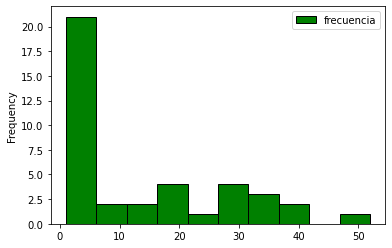

In [76]:
df_price = df.groupby("Price")
df_price_group =  df_price.agg(frecuencia=("Price", "count"))

df_price_group.plot.hist(ec= 'black', color='green')

<AxesSubplot:ylabel='Frequency'>

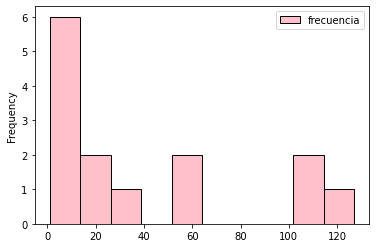

In [78]:
df_price1 = df.groupby("User Rating")
df_price_group1 =  df_price1.agg(frecuencia=("User Rating", "count"))

df_price_group1.plot.hist(ec= 'black', color='pink')